C'est un filtre **passe Bande**, car le spectre du signal utile se trouve à l'intérieur d’une plage de fréquence limitée par les deux fréquence de coupure **fc1** et **fc2**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter, freqz,unit_impulse

In [ ]:
# Parameteres
fc1 = 1000  # Hz
fc2 = 3000  # Hz
ordre = 4
ordre_2 = 15
fe = 8000  # Hz
fmax = fe / 2

Les fréquences de coupure normalisées du filtre.

In [ ]:
# frequence normalisee
freq1_nrm = fc1 / fmax
freq2_nrm = fc2 / fmax
print ("fc1_nrm:", freq1_nrm)
print ("fc2_nrm:", freq2_nrm)

fc1_nrm: 0.25
fc2_nrm: 0.75


In [ ]:
#calcul des coeffs ai et bi
#ordre 4
bi, ai = butter(ordre, [freq1_nrm,freq2_nrm],btype='band',analog=False)
print("Coefficients ai:", ai)
print("Coefficients bi:", bi)


#ordre 15
bi2, ai2 = butter(ordre_2, [freq1_nrm,freq2_nrm],btype='band',analog=False)
print("Coefficients ai_2:", ai2)
print("Coefficients bi_2:", bi2)

Coefficients ai: [ 1.00000000e+00 -4.44089210e-16 -2.77555756e-16  2.22044605e-16
  4.86028822e-01 -5.55111512e-17 -5.72458747e-17 -1.73472348e-18
  1.76648009e-02]
Coefficients bi: [ 0.09398085  0.         -0.37592341  0.          0.56388511  0.
 -0.37592341  0.          0.09398085]
Coefficients ai_2: [ 1.00000000e+00 -2.22044605e-16 -2.83106871e-15 -1.69864123e-14
  2.03195340e+00 -1.51197240e-13 -3.18522986e-13 -4.58855176e-13
  1.51460030e+00 -1.71272641e-14  5.19251309e-13  9.43578549e-13
  5.23082371e-01  8.37327854e-13  4.84126628e-13  2.02803052e-13
  8.72521348e-02  9.21202148e-15 -1.24986826e-15 -1.26981758e-15
  6.67191433e-03  1.59855179e-16  7.75882180e-17  2.84874121e-17
  1.98617798e-04  1.65954648e-18  1.72900600e-19  1.29172524e-20
  1.48999057e-06 -1.65422182e-22 -8.27110916e-23]
Coefficients bi_2: [ 1.57585456e-04  0.00000000e+00 -2.36378185e-03  0.00000000e+00
  1.65464729e-02  0.00000000e+00 -7.17013827e-02  0.00000000e+00
  2.15104148e-01  0.00000000e+00 -4.732291

<ipython-input-5-c1e3a68797da>:7: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(np.arange(0, 50), response, use_line_collection=True)


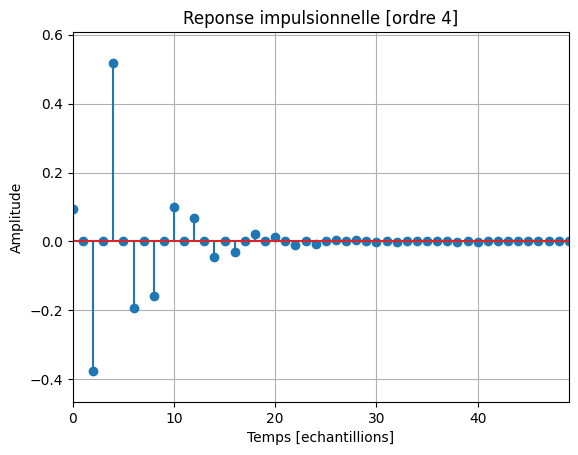

<ipython-input-5-c1e3a68797da>:20: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(np.arange(0, 50), response2, use_line_collection=True)


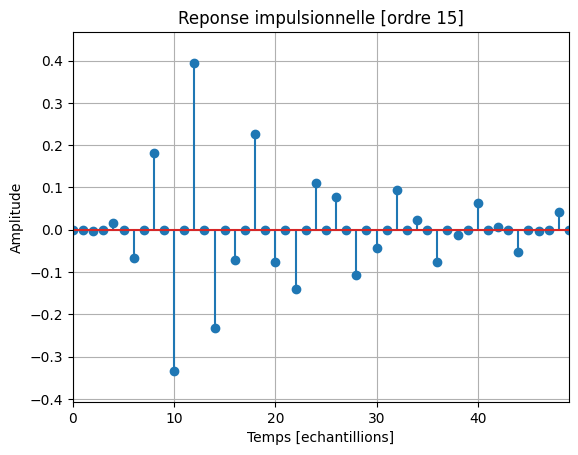

In [ ]:
#response impulsionnelle
#ordre 4
num_echantillions=50
imp = unit_impulse(num_echantillions)
response = lfilter(bi, ai, imp)

plt.stem(np.arange(0, 50), response, use_line_collection=True)
plt.margins(0, 0.1)
plt.title('Reponse impulsionnelle [ordre 4]')
plt.xlabel('Temps [echantillions]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()


#ordre 15
imp = unit_impulse(num_echantillions)
response2 = lfilter(bi2, ai2, imp)

plt.stem(np.arange(0, 50), response2, use_line_collection=True)
plt.margins(0, 0.1)
plt.title('Reponse impulsionnelle [ordre 15]')
plt.xlabel('Temps [echantillions]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()


<ipython-input-7-ceecf6ed39a4>:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(0.5 * fe * frequences / np.pi, np.abs(response2), 'b', color='green')


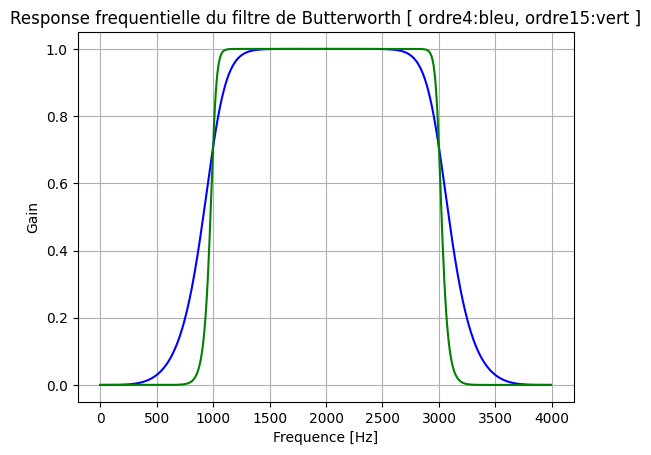

In [ ]:
#fonction de transfert

frequences, response1 = freqz(bi, ai, 512)
frequences, response2 = freqz(bi2, ai2, 512)

plt.plot(0.5 * fe * frequences / np.pi, np.abs(response1), 'b')
plt.plot(0.5 * fe * frequences / np.pi, np.abs(response2), 'b', color='green')
plt.title('Response frequentielle du filtre de Butterworth [ ordre 4 bleu, ordre 15 vert ]')
plt.xlabel('Frequence [Hz]')
plt.ylabel('Gain')
plt.grid(True)
plt.show()

